# import

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import cm

import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict


# Import required packages
import numpy as np
import pandas as pd
#import plotly_express as px


from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr
from astropy import constants
from astropy import units as u
from astropy import units

from datetime import datetime, date, time, timezone
from datetime import datetime
from datetime import timedelta
from astropy.time import Time
from astropy.io import ascii




%matplotlib inline
%config InlineBackend.figure_format='svg'


import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_6792/1259852798.py:24: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

def get_info(data,label,label_err=None):
    return min(data[label]),max(data[label]),np.mean(data[label])
    

In [3]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [ ]:
convert_date_single(59000)

In [ ]:
convert_xaxis_mjd(datetime(2018, 7, 12, 0, 0))

In [ ]:
convert_date_single(59891.247692)

In [ ]:
convert_date_single(59920)

In [ ]:
convert_date_single(59910)

## set_ax

In [4]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    
def set_ax_legend_sequence(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    #by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)    
    

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

In [5]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [6]:
dataroot_dir='/Users/lyubing/IHEPBox/data/data_clagn/CLAGN_uvot_XRT_fig'

Filter	Central Wavelength (Å)
v	5468
b	4392
u	3465
uvw1	2600
uvm2	2246
uvw2	1928

## markers_pd



In [7]:
markers_pd=['o','^','v','s','p','d','+']

## uvot

In [8]:
nu_uvv=(constants.c/(5468*units.AA)).to(u.Hz).value
nu_ubb=(constants.c/(4392*units.AA)).to(u.Hz).value
nu_uuu=(constants.c/(3465*units.AA)).to(u.Hz).value
nu_uw1=(constants.c/(2600*units.AA)).to(u.Hz).value
nu_um2=(constants.c/(2246*units.AA)).to(u.Hz).value
nu_uw2=(constants.c/(1928*units.AA)).to(u.Hz).value

uvot_6bands=['uvv','ubb','uuu','uw1','um2','uw2']
uvot_6bands_label=['V','B','U','UVW1','UVM2','UVW2']

colors_cm_10 = cm.get_cmap('tab10', 10)
colors_6band=[colors_cm_10(0),colors_cm_10(2),colors_cm_10(3),colors_cm_10(4),colors_cm_10(8),colors_cm_10(9)]
markers_6bands=['o','^','v','s','p','d']


nu_uvot_6bands=[nu_uvv,nu_ubb,nu_uuu,nu_uw1,nu_um2,nu_uw2]
lambda_uvot_6bands=[5468,4392,3465,2600,2246,1928]


In [72]:
lambda_uvot_6bands[::-1]

[1928, 2246, 2600, 3465, 4392, 5468]

In [9]:
marker_dict_uv = dict(zip(uvot_6bands, markers_6bands))
color_dict_uv = dict(zip(uvot_6bands, colors_6band))
label_dict_uv= dict(zip(uvot_6bands, uvot_6bands_label))
lambda_dict_uv=dict(zip(uvot_6bands,lambda_uvot_6bands))

lambda_dict_UVlabel=dict(zip(uvot_6bands_label,lambda_uvot_6bands))

In [ ]:
1 Kiloelectron Volt = 2.41799050402293E+17 Hertz

In [ ]:
constants.c/2.41799050402293E+17*1e10

In [ ]:
constants.c/2.41799050402293E+17*1e10*10

# sourcename='Mrk590'

In [10]:
sourcename='Mrk590'

uvot_uvv_Mrk590=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb_Mrk590=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu_Mrk590=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1_Mrk590=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2_Mrk590=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2_Mrk590=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

#uvot_band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvot_6band_data_Mrk590=[uvot_uvv_Mrk590,uvot_ubb_Mrk590,uvot_uuu_Mrk590,uvot_uw1_Mrk590,uvot_um2_Mrk590,uvot_uw2_Mrk590]
uvdata_dict_Mrk590=dict(zip(uvot_6bands, uvot_6band_data_Mrk590))


uvot_uvv[[uvot_uvv.columns[3],uvot_uvv.columns[6],uvot_uvv.columns[7]]]

## XRT

instrument_label=['XMM-Newton','Swift','Chandra','NuSTAR','Suzaku']
instrument=['X','S','C','N','Su']
markers_ins=['o','^','s','p','v']
corlors_ins=[colors_cm_10(0),colors_cm_10(2),colors_cm_10(3),colors_cm_10(4),colors_cm_10(9)]
marker_dict_ins = dict(zip(instrument, markers_ins))
color_dict_ins= dict(zip(instrument, corlors_ins))
instrument_dict= dict(zip(instrument, instrument_label))

In [11]:
XRT_rate_Mrk590=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)

In [12]:
XRT_rate_Mrk590.columns

Index(['time', 'rate', 'error', 'obsid'], dtype='object')

## ASAS-SN

In [13]:
ASASSN_Mrk590=pd.read_csv('/Users/lyubing/IHEPBox/data/data_clagn/ASAS_SN_data/Mrk590_light_curve_a2fea627-6423-4ddf-9a79-08a832354d30.csv',header=0)

In [14]:
ASASSN_Mrk590_V=ASASSN_Mrk590[ASASSN_Mrk590['Filter']=='V']
ASASSN_Mrk590_g=ASASSN_Mrk590[ASASSN_Mrk590['Filter']=='g']
ASASSN_Mrk590_V=ASASSN_Mrk590_V[ASASSN_Mrk590_V['flux_err']!=99.990]
ASASSN_Mrk590_g=ASASSN_Mrk590_g[ASASSN_Mrk590_g['flux_err']!=99.990]

ASASSN_Mrk590_V=drop_index(ASASSN_Mrk590_V)
ASASSN_Mrk590_g=drop_index(ASASSN_Mrk590_g)

In [ ]:
ASASSN_Mrk590_g[ASASSN_Mrk590_g['flux_err']>1]

In [ ]:
print(uvot_uvv.columns[3],uvot_uvv.columns[6],uvot_uvv.columns[7])

## def ZTF mag2flxu

$f=10^{-0.4(m-8.9)}$ [](JY)

$\sigma_f=0.4 \mathrm{ln}(10) \times f \times \sigma_m $



In [15]:
def ztf_mag2flux(data,mag_label_,magerr_label): #Jy
    data['flux']=  10**((data['mag']-8.9)*(-0.4))#Jy
    data['flux_err']=0.4 *np.log(10)*data['flux']*data['magerr']
    return data   

## def get_lagdata_ztf

In [16]:
def get_lagdata_ztf(data_r_):
    lag_zrf_r_=pd.DataFrame()
    lag_zrf_r_['t']=data_r_['mjd']
    lag_zrf_r_['flux']=      data_r_['flux']*1000
    lag_zrf_r_['flux_err']=  data_r_['flux_err']*1000
    lag_zrf_r_=lag_zrf_r_.sort_values('t')
    lag_zrf_r_=drop_index(lag_zrf_r_)
    return lag_zrf_r_

## ztf

In [17]:
from ztfquery import lightcurve

410nm—550nm and 700nm—900nm respectively: BANDNAME=g,i
g 410nm—550nm 
r 550nm-700nm
i 700nm—900nm

In [18]:
circle_Mrk590=[33.6398442,-0.7666930,0.0014]

data_g_Mrk590 = lightcurve.LCQuery.download_data(circle=circle_Mrk590, bandname="g",BAD_CATFLAGS_MASK=32768)

data_i_Mrk590 = lightcurve.LCQuery.download_data(circle=circle_Mrk590, bandname="i",BAD_CATFLAGS_MASK=15)

data_r_Mrk590= lightcurve.LCQuery.download_data(circle=circle_Mrk590, bandname="r",BAD_CATFLAGS_MASK=32768)

In [ ]:
data_g_Mrk590.columns

In [19]:
mag_label_,magerr_label=('mag','magerr')
data_g_Mrk590=ztf_mag2flux(data_g_Mrk590,mag_label_,magerr_label)
data_r_Mrk590=ztf_mag2flux(data_r_Mrk590,mag_label_,magerr_label)
data_i_Mrk590=ztf_mag2flux(data_i_Mrk590,mag_label_,magerr_label)

data_g_Mrk590['flux'],data_g_Mrk590['flux_err']

In [ ]:
data_r_Mrk590

In [ ]:
data_g_Mrk590

In [ ]:
data_i_Mrk590

## plot

In [21]:
uvot_6bands,colors_6band,markers_6bands

(['uvv', 'ubb', 'uuu', 'uw1', 'um2', 'uw2'],
 [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
  (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
  (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
  (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
  (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
  (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)],
 ['o', '^', 'v', 's', 'p', 'd'])

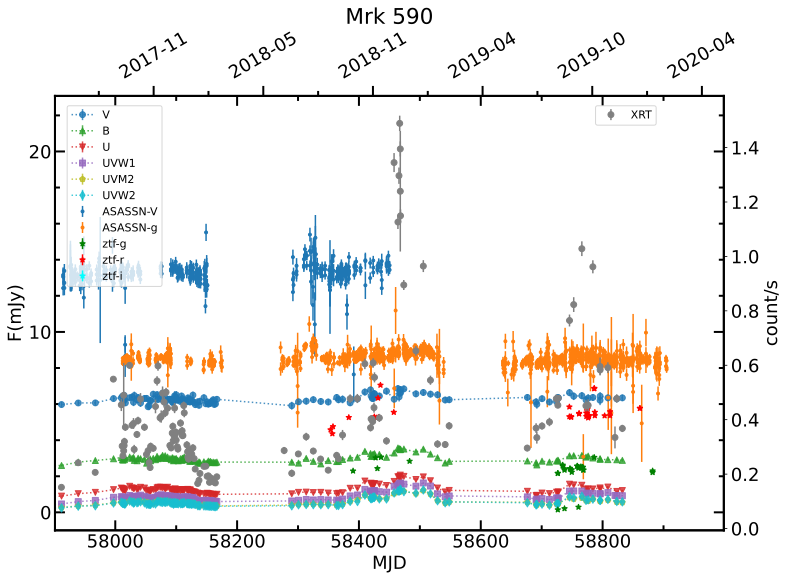

In [22]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):
    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    
ax.errorbar(ASASSN_Mrk590_V['HJD']-2400000.5,ASASSN_Mrk590_V['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_V['flux_err'],label='ASASSN-V',ls='',)    
ax.errorbar(ASASSN_Mrk590_g['HJD']-2400000.5,ASASSN_Mrk590_g['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_g['flux_err'],label='ASASSN-g',ls='',) 



ax.errorbar(data_g_Mrk590['mjd'],
            data_g_Mrk590['flux']*1000,
            yerr=data_g_Mrk590['flux_err']*1000,            
            marker='*',
            color='green',
            label='ztf-g',ls='',) 
ax.errorbar(data_r_Mrk590['mjd'],
            data_r_Mrk590['flux']*1000,
            yerr=data_r_Mrk590['flux_err']*1000,  
            color='red',
            marker='*',
            label='ztf-r',ls='',) 
ax.errorbar(data_i_Mrk590['mjd'],
            data_i_Mrk590['flux']*1000,
            yerr=data_i_Mrk590['flux_err']*1000 ,           
            marker='*',
            color='cyan',
            label='ztf-i',ls='',) 

ax_x=ax.twinx()
ax_x.errorbar(XRT_rate_Mrk590['time'],XRT_rate_Mrk590['rate'],XRT_rate_Mrk590['error'],
             marker='o',
             color='grey',
             label='XRT',ls='',) 
ax_x.set_ylabel('count/s')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=200,xmi=100,yma=10,ymi=2)

plot_secax(ax,mi_interval=90,ma_interval=180,rotation=30)

ax.set_title('Mrk 590')


range_l,range_r=(57900+1,59000-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


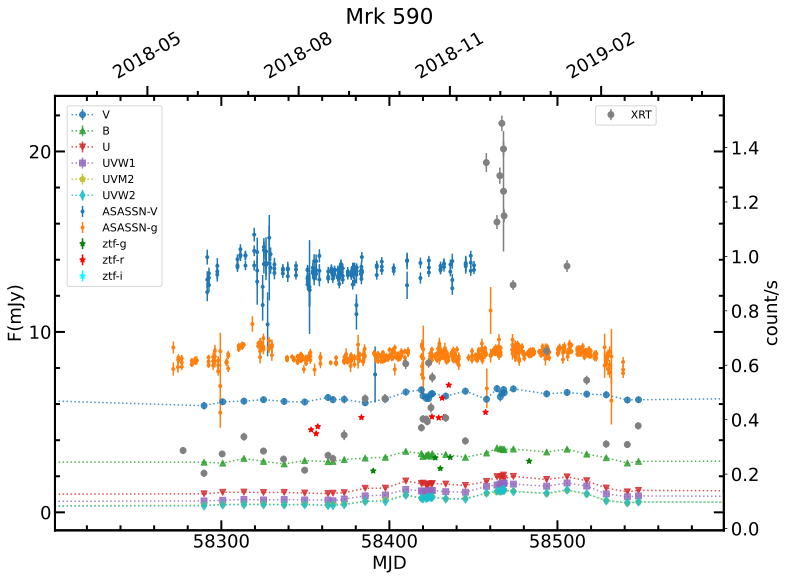

In [23]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):

    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    
ax.errorbar(ASASSN_Mrk590_V['HJD']-2400000.5,ASASSN_Mrk590_V['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_V['flux_err'],label='ASASSN-V',ls='',)    
ax.errorbar(ASASSN_Mrk590_g['HJD']-2400000.5,ASASSN_Mrk590_g['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_g['flux_err'],label='ASASSN-g',ls='',) 


ax.errorbar(data_g_Mrk590['mjd'],
            data_g_Mrk590['flux']*1000,
            yerr=data_g_Mrk590['flux_err']*1000,            
            marker='*',
            color='green',
            label='ztf-g',ls='',) 
ax.errorbar(data_r_Mrk590['mjd'],
            data_r_Mrk590['flux']*1000,
            yerr=data_r_Mrk590['flux_err']*1000,  
            color='red',
            marker='*',
            label='ztf-r',ls='',) 
ax.errorbar(data_i_Mrk590['mjd'],
            data_i_Mrk590['flux']*1000,
            yerr=data_i_Mrk590['flux_err']*1000 ,           
            marker='*',
            color='cyan',
            label='ztf-i',ls='',) 

ax_x=ax.twinx()
ax_x.errorbar(XRT_rate_Mrk590['time'],XRT_rate_Mrk590['rate'],XRT_rate_Mrk590['error'],
             marker='o',
             color='grey',
             label='XRT',ls='',) 
ax_x.set_ylabel('count/s')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=100,xmi=20,yma=10,ymi=2)

plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)
#ax.set_xlim(57900,59000)
#ax.set_xlim(58200+1,58600-1)


ax.set_title('Mrk 590')

range_l,range_r=(58200+1,58600-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


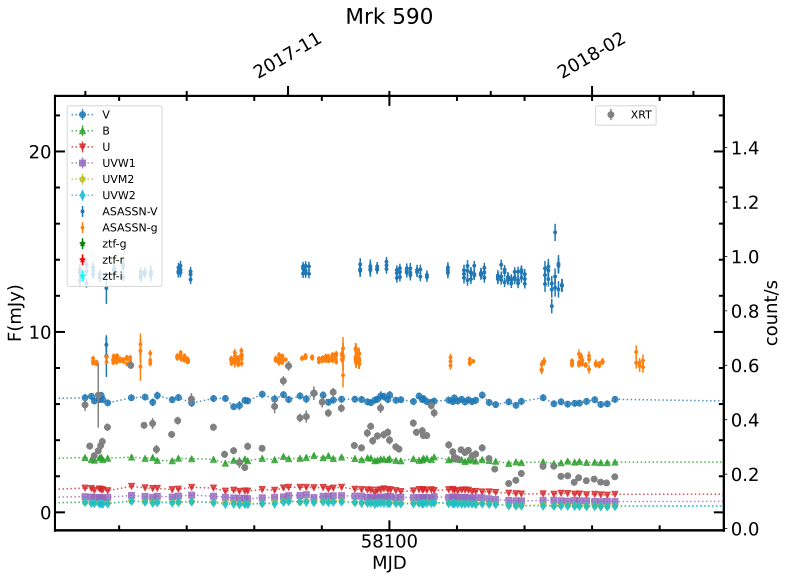

In [24]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):

    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    
ax.errorbar(ASASSN_Mrk590_V['HJD']-2400000.5,ASASSN_Mrk590_V['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_V['flux_err'],label='ASASSN-V',ls='',)    
ax.errorbar(ASASSN_Mrk590_g['HJD']-2400000.5,ASASSN_Mrk590_g['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_g['flux_err'],label='ASASSN-g',ls='',) 


ax.errorbar(data_g_Mrk590['mjd'],
            data_g_Mrk590['flux']*1000,
            yerr=data_g_Mrk590['flux_err']*1000,            
            marker='*',
            color='green',
            label='ztf-g',ls='',) 
ax.errorbar(data_r_Mrk590['mjd'],
            data_r_Mrk590['flux']*1000,
            yerr=data_r_Mrk590['flux_err']*1000,  
            color='red',
            marker='*',
            label='ztf-r',ls='',) 
ax.errorbar(data_i_Mrk590['mjd'],
            data_i_Mrk590['flux']*1000,
            yerr=data_i_Mrk590['flux_err']*1000 ,           
            marker='*',
            color='cyan',
            label='ztf-i',ls='',) 

ax_x=ax.twinx()
ax_x.errorbar(XRT_rate_Mrk590['time'],XRT_rate_Mrk590['rate'],XRT_rate_Mrk590['error'],
             marker='o',
             color='grey',
             label='XRT',ls='',) 
ax_x.set_ylabel('count/s')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=100,xmi=20,yma=10,ymi=2)

plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)
#ax.set_xlim(57900,59000)
#ax.set_xlim(58200+1,58600-1)


ax.set_title('Mrk 590')

range_l,range_r=(58000+1,58200-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


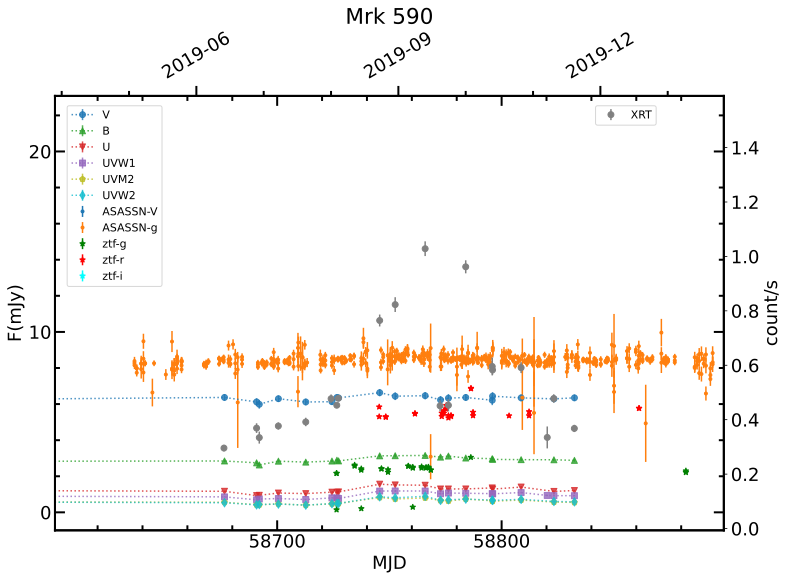

In [25]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):

    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    
ax.errorbar(ASASSN_Mrk590_V['HJD']-2400000.5,ASASSN_Mrk590_V['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_V['flux_err'],label='ASASSN-V',ls='',)    
ax.errorbar(ASASSN_Mrk590_g['HJD']-2400000.5,ASASSN_Mrk590_g['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_g['flux_err'],label='ASASSN-g',ls='',) 





ax.errorbar(data_g_Mrk590['mjd'],
            data_g_Mrk590['flux']*1000,
            yerr=data_g_Mrk590['flux_err']*1000,            
            marker='*',
            color='green',
            label='ztf-g',ls='',) 
ax.errorbar(data_r_Mrk590['mjd'],
            data_r_Mrk590['flux']*1000,
            yerr=data_r_Mrk590['flux_err']*1000,  
            color='red',
            marker='*',
            label='ztf-r',ls='',) 
ax.errorbar(data_i_Mrk590['mjd'],
            data_i_Mrk590['flux']*1000,
            yerr=data_i_Mrk590['flux_err']*1000 ,           
            marker='*',
            color='cyan',
            label='ztf-i',ls='',) 

ax_x=ax.twinx()
ax_x.errorbar(XRT_rate_Mrk590['time'],XRT_rate_Mrk590['rate'],XRT_rate_Mrk590['error'],
             marker='o',
             color='grey',
             label='XRT',ls='',) 
ax_x.set_ylabel('count/s')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=100,xmi=20,yma=10,ymi=2)

plot_secax(ax,mi_interval=30,ma_interval=90,rotation=30)
#ax.set_xlim(57900,59000)
#ax.set_xlim(58200+1,58600-1)


ax.set_title('Mrk 590')

range_l,range_r=(58600+1,58900-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


### UV-XRT

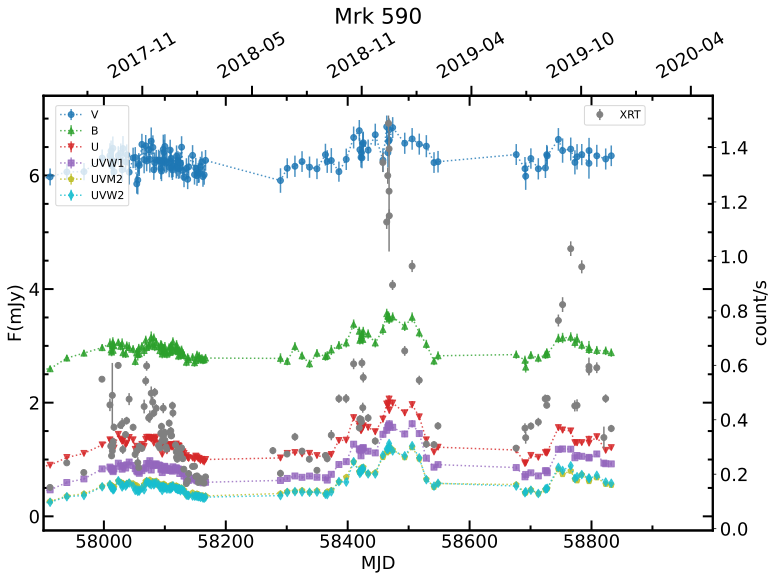

In [26]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):

    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    


ax_x=ax.twinx()
ax_x.errorbar(XRT_rate_Mrk590['time'],XRT_rate_Mrk590['rate'],XRT_rate_Mrk590['error'],
             marker='o',
             color='grey',
             label='XRT',ls='',) 
ax_x.set_ylabel('count/s')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=200,xmi=100,yma=2,ymi=0.5)

plot_secax(ax,mi_interval=90,ma_interval=180,rotation=30)

ax.set_title('Mrk 590')
range_l,range_r=(57900+1,59000-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_UV_XRT_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


### UV-ASAS-SN

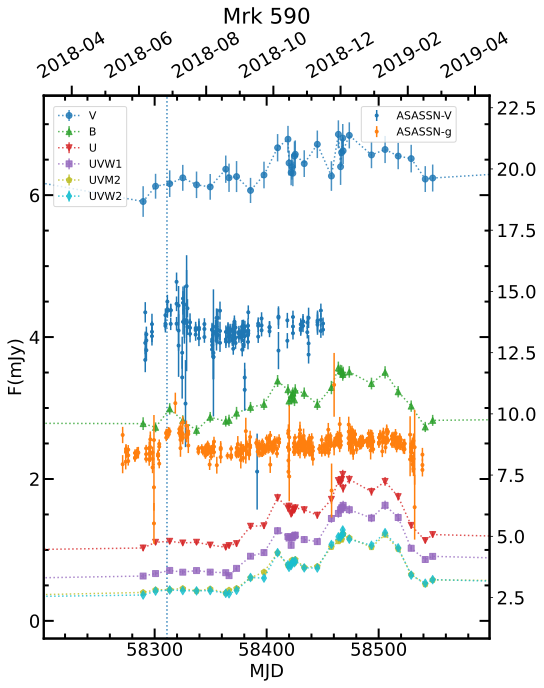

In [27]:
fig = plt.figure(figsize=(8, 10))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):

    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    

ax_x=ax.twinx()
ax_x.errorbar(ASASSN_Mrk590_V['HJD']-2400000.5,ASASSN_Mrk590_V['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_V['flux_err'],label='ASASSN-V',ls='',)    
ax_x.errorbar(ASASSN_Mrk590_g['HJD']-2400000.5,ASASSN_Mrk590_g['flux(mJy)'],
            marker='.',
            yerr=ASASSN_Mrk590_g['flux_err'],label='ASASSN-g',ls='',) 
#ax_x.set_ylabel('')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.7,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=100,xmi=20,yma=2,ymi=0.5)

plot_secax(ax,mi_interval=30,ma_interval=60,rotation=30)

ax.axvline(58311,ls=':', alpha=0.9,label='supernova ASASSN-18pb')


ax.set_title('Mrk 590')
range_l,range_r=(58200+1,58600-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_UV_ASASSN_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


### UV-ztf

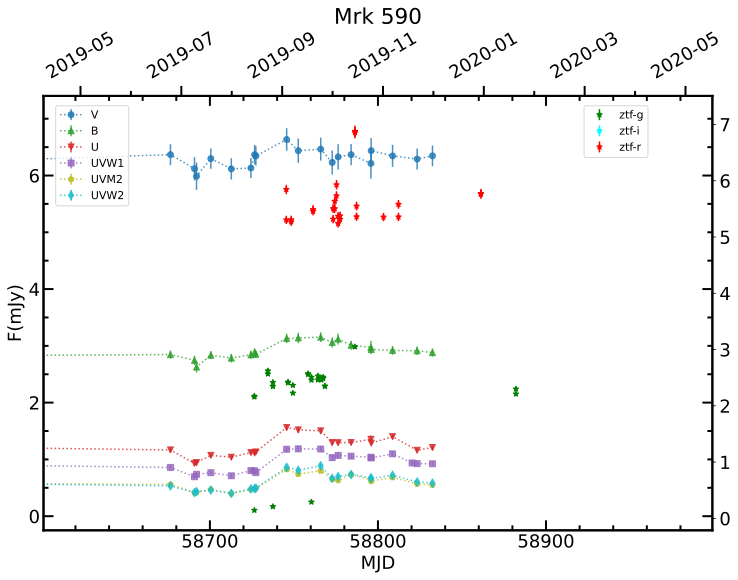

In [28]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(1,1,1)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data_Mrk590,colors_6band,markers_6bands)):

    ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
    



ax_x=ax.twinx()
ax_x.errorbar(data_g_Mrk590['mjd'],
            data_g_Mrk590['flux']*1000,
            yerr=data_g_Mrk590['flux_err']*1000,            
            marker='*',
            color='green',
            label='ztf-g',ls='',) 
ax_x.errorbar(data_r_Mrk590['mjd'],
            data_r_Mrk590['flux']*1000,
            yerr=data_r_Mrk590['flux_err']*1000,  
            color='red',
            marker='*',
            label='ztf-r',ls='',) 
ax_x.errorbar(data_i_Mrk590['mjd'],
            data_i_Mrk590['flux']*1000,
            yerr=data_i_Mrk590['flux_err']*1000 ,           
            marker='*',
            color='cyan',
            label='ztf-i',ls='',) #ax_x.set_ylabel('')

ax.set_xlabel('MJD')
ax.set_ylabel('F(mJy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=100,xmi=20,yma=2,ymi=0.5)

plot_secax(ax,mi_interval=30,ma_interval=60,rotation=30)

ax.set_title('Mrk 590')
range_l,range_r=(58600+1,59000-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/Mrk590_UV_ztf_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


# def write_lagfile

In [65]:
def write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+'_'+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data1):
        #os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+'_'+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data2):
        #os.remove(path_data2)            
    data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2    

In [66]:
def get_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    #data1= dataname1[dataname1['t']>rangemin]
    #data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+'_'+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    #data2= dataname2[dataname2['t']>rangemin]
    #data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+'_'+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2 

In [67]:
def write_javelin_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    data1=data1.sort_values('t')
    path_data1=os.path.join(rootdir,sourcename,labelname1+'_'+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data1):
        os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=' ')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax] 
    data2=data2.sort_values('t')
    path_data2=os.path.join(rootdir,sourcename,labelname2+'_'+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data2):
        os.remove(path_data2)    
    data2.to_csv(path_data2,index=False,header=False,sep=' ')  
    return path_data1,path_data2    

# ccf

In [32]:
def run_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    
    source_path=os.path.join(rootdir,sourcename)
    
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)  

In [33]:
def plot_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    source_path=os.path.join(rootdir,sourcename)
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python CCF_plot.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)    

In [34]:
root_dir='/Volumes/ExtremeSSD/00PKU_SCI/CLAGN'
rootdir_ccf_xray='%s/00CCF_xray/'%root_dir
if not os.path.exists(rootdir_ccf_xray):
    os.mkdir(rootdir_ccf_xray)
    print(rootdir_ccf_xray)
print(rootdir_ccf_xray)

/Volumes/ExtremeSSD/00PKU_SCI/CLAGN/00CCF_xray/


In [73]:
21/412

0.050970873786407765

root_dir='/Volumes/ExtremeSSD/00PKU_SCI/CLAGN'
rootdir_ccf='%s/00CCF_uvw2/'%root_dir
if not os.path.exists(rootdir_ccf):
    os.mkdir(rootdir_ccf)
    print(rootdir_ccf)
print(rootdir_ccf)

# javelin

In [ ]:
def run_javelin(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30,widthl=0,widthh=200):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir_javelin)
    source_path=os.path.join(rootdir_javelin,sourcename)
    path_data1,path_data2=write_javelin_lagfile(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python javelin_spec.py %s %s %d %d %d %d %d %d %s'%(path_data1,path_data2,rangemin,rangemax,lagrangel,lagrangeh,widthl,widthh,source_path)
    print(command)
    os.system(command)  

## def plot_javelin

In [64]:
import matplotlib.pyplot as plt
from astropy.visualization import hist
from scipy import stats 

def plot_javelin(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh):
    lc1,lc2=get_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)

    time_min,time_max=rangemin,rangemax
    lag_range = [lagrangel, lagrangeh]
    lc1label=lc1.split('/')[-1][:-4]
    lc2label=lc2.split('/')[-1][:-4]

    data1=np.loadtxt(lc1,  comments='#', delimiter=' ')
    data2=np.loadtxt(lc2,  comments='#', delimiter=' ')
    mjd1, flux1, err1 =data1[:,0],data1[:,1],data1[:,2]
    mjd2, flux2, err2 =data2[:,0],data2[:,1],data2[:,2]


    mjd1, flux1, err1=get_new_range_datas(mjd1, flux1, err1,time_min,time_max)
    mjd2, flux2, err2=get_new_range_datas(mjd2, flux2, err2,time_min,time_max)



    tag = ""   
    #confchain = "dat/chain0.dat" + tag
    #topfchain = "dat/chain1.dat" + tag
    #doufchain = "dat/chain2.dat" + tag
    phofchain = "%s/%s/%s_mcmc_%s.dat"%(rootdir,sourcename,lc1label,lc2label) + tag
    javelin_lag_data=pd.read_csv(phofchain,header=None,sep=' ')
    lag_javelin=javelin_lag_data[2]
    width_javelin_data=javelin_lag_data[3]
    

    ###Calculate the best peak and centroid and their uncertainties using the median of the
    ##distributions.
    perclim = 84.1344746
    centau = stats.scoreatpercentile(lag_javelin, 50)
    centau_uperr = (stats.scoreatpercentile(lag_javelin, perclim))-centau
    centau_loerr = centau-(stats.scoreatpercentile(lag_javelin, (100.-perclim)))

    width_javelin = stats.scoreatpercentile(width_javelin_data, 50)
    width_javelin_uperr = (stats.scoreatpercentile(width_javelin_data, perclim))-width_javelin
    width_javelin_loerr = width_javelin-(stats.scoreatpercentile(width_javelin_data, (100.-perclim)))

    ##########################################
    #Write results out to a file in case we want them later.
    ##########################################


    fig = plt.figure(figsize=(8,6))
    fig.subplots_adjust(hspace=0.4, wspace = 0.15)

    #Plot lightcurves
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.errorbar(mjd1, flux1, yerr = err1, marker = 'o', linestyle = ':', color = 'k', label = 'LC 1 (%s)'%lc1label)
    if max(mjd1)-min(mjd1) < 30:
        mi_interval,ma_interval=(5,10)
    elif max(mjd1)-min(mjd1) < 100:
        mi_interval,ma_interval=(10,30)
    elif max(mjd1)-min(mjd1) < 300:
        mi_interval,ma_interval=(30,60)
    elif max(mjd1)-min(mjd1) < 1000:
        mi_interval,ma_interval=(60,180)
    elif max(mjd1)-min(mjd1) < 2000:
        mi_interval,ma_interval=(90,360)
    else:
        mi_interval,ma_interval=(180,360)
    plot_secax(ax1,mi_interval=mi_interval,ma_interval=ma_interval,rotation=30,) 

    
    
    ax1_2 = ax1.twinx()
    ax1_2.errorbar(mjd2, flux2, yerr = err2, marker = '*', linestyle = ':', color = 'red', label = 'LC 2 (%s)'%lc2label)

    #ax1.text(0.025, 0.825, lc1label, fontsize = 15, transform = ax1.transAxes)
    #ax1_2.text(0.025, 0.825, lc2label, fontsize = 15, transform = ax1_2.transAxes)
    ax1.set_ylabel('LC 1 Flux')
    ax1_2.set_ylabel('LC 2 Flux')
    ax1.set_xlabel('MJD')
    #ax1.semilogy()
    #ax1_2.semilogy()

    #Plot CCF Information
    #xmin, xmax = -99, 99
    xmin, xmax = lag_range[0],lag_range[1]

    ax2 = fig.add_subplot(2,2,3)
    
    ax2.axvline(centau,color='black',ls='-',lw=1,)
    ax2.axvline(centau+centau_uperr,color='black',ls='--',lw=1,)
    ax2.axvline(centau-centau_loerr,color='black',ls='--',lw=1,)
        
   
     #ax2.set_ylim(0.0, 1.0)
    
    hist(lag_javelin,ax=ax2,bins=100,color='grey',density=True,zorder=0)
    
    ax2_1= fig.add_subplot(2, 2, 4)
    ax2_2=ax2_1.twinx()
    
    ax2_2.axvline(width_javelin,color='black',ls='-',lw=1,)
    ax2_2.axvline(width_javelin+width_javelin_uperr,color='black',ls='--',lw=1,)
    ax2_2.axvline(width_javelin-width_javelin_loerr,color='black',ls='--',lw=1,)
    hist(width_javelin_data,ax=ax2_2,bins=100,color='grey',density=True,zorder=0)

    
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')
    
    ax2.set_xlim(xmin, xmax)
    ax2_2.set_xlim(min(width_javelin_data),max(width_javelin_data))
    
    ax2_1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in',labelsize=0)
    ax2_1.yaxis.set_tick_params(which='minor', size=10, width=2, direction='in',labelsize=0)
    
    ax2.set_xlabel('Centroid Lag: %5.1f (+%5.1f -%5.1f)\n'%(centau, centau_uperr, centau_loerr), fontsize = 15)
    ax2_1.set_xlabel('Centroid width: %5.1f (+%5.1f -%5.1f)\n'%(width_javelin, width_javelin_uperr, width_javelin_loerr),fontsize = 15)

    #set_ax_tick(ax1)
    #set_ax_tick(ax1_2)
    set_ax_tick(ax2) 
    set_ax_tick(ax2_2) 
    ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)
    ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax1.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)
    #set_ax_locator(ax2,xma=50,xmi=25,yma=0.4,ymi=0.2)
    #set_ax_locator(ax2_2,xma=50,xmi=25,yma=0.4,ymi=0.2)
   
    #plt.show()
    plt.savefig('%s/%s/hist_%s_%s_javelin_%s_VS_%s_Centroid,error%10.3f(+%10.3f-%10.3f)_lagrange_%d_%d_d.png'%(rootdir,sourcename,int(time_min),int(time_max),lc1label,lc2label,centau, centau_uperr,centau_loerr,int(lag_range[0]),int(lag_range[1])), format = 'png', orientation = 'landscape', bbox_inches = 'tight')
    plt.close(fig)

In [59]:
root_dir='/Volumes/ExtremeSSD/00PKU_SCI/CLAGN'
rootdir_javelin='%s/Javelin_Xray/'%root_dir
if not os.path.exists(rootdir_javelin):
    os.mkdir(rootdir_javelin)
    print(rootdir_javelin)

/Volumes/ExtremeSSD/00PKU_SCI/CLAGN/Javelin_Xray/


# javelin_result

In [ ]:
sourcename='Mrk590'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58600+1,58900-1
    lagrangel=-20
    lagrangeh=20
    widthl=0
    widthh=100
    run_javelin(rootdir_javelin,sourcename,labelname1,labelname2,
            dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh,widthl,widthh)
    
    plot_javelin(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
lag_Xray_Mrk590=XRT_rate_Mrk590[['time','rate','error']]
lag_Xray_Mrk590.columns=['t','flux','flux_err']
lag_Xray_Mrk590=lag_Xray_Mrk590.sort_values('t')
lag_Xray_Mrk590=drop_index(lag_Xray_Mrk590)

In [ ]:
lag_asassn_g_Mrk590=pd.DataFrame()
lag_asassn_g_Mrk590['t']=ASASSN_Mrk590_g['HJD']-2400000.5
lag_asassn_g_Mrk590['flux']=ASASSN_Mrk590_g['flux(mJy)']
lag_asassn_g_Mrk590['flux_err']=ASASSN_Mrk590_g['flux_err']
lag_asassn_g_Mrk590=lag_asassn_g_Mrk590.sort_values('t')
lag_asassn_g_Mrk590=drop_index(lag_asassn_g_Mrk590)

lag_asassn_v_Mrk590=pd.DataFrame()
lag_asassn_v_Mrk590['t']=ASASSN_Mrk590_V['HJD']-2400000.5
lag_asassn_v_Mrk590['flux']=ASASSN_Mrk590_V['flux(mJy)']
lag_asassn_v_Mrk590['flux_err'] =ASASSN_Mrk590_V['flux_err']
lag_asassn_v_Mrk590=lag_asassn_v_Mrk590.sort_values('t')
lag_asassn_v_Mrk590=drop_index(lag_asassn_v_Mrk590)

In [ ]:
len(lag_asassn_g_Mrk590),len(lag_asassn_v_Mrk590)

In [ ]:
lag_zrf_r_Mrk590=pd.DataFrame()
lag_zrf_r_Mrk590['t']=data_r_Mrk590['mjd']
lag_zrf_r_Mrk590['flux']=      data_r_Mrk590['flux']*1000
lag_zrf_r_Mrk590['flux_err']=  data_r_Mrk590['flux_err']*1000
lag_zrf_r_Mrk590=lag_zrf_r_Mrk590.sort_values('t')
lag_zrf_r_Mrk590=drop_index(lag_zrf_r_Mrk590)



lag_zrf_i_Mrk590=pd.DataFrame()
lag_zrf_i_Mrk590['t']=data_i_Mrk590['mjd']
lag_zrf_i_Mrk590['flux']=      data_i_Mrk590['flux']*1000
lag_zrf_i_Mrk590['flux_err']=  data_i_Mrk590['flux_err']*1000
lag_zrf_i_Mrk590=lag_zrf_i_Mrk590.sort_values('t')
lag_zrf_i_Mrk590=drop_index(lag_zrf_i_Mrk590)


lag_zrf_g_Mrk590=pd.DataFrame()
lag_zrf_g_Mrk590['t']=data_g_Mrk590['mjd']
lag_zrf_g_Mrk590['flux']=      data_g_Mrk590['flux']*1000
lag_zrf_g_Mrk590['flux_err']=  data_g_Mrk590['flux_err']*1000
lag_zrf_g_Mrk590=lag_zrf_g_Mrk590.sort_values('t')
lag_zrf_g_Mrk590=drop_index(lag_zrf_g_Mrk590)





In [ ]:
len(lag_zrf_i_Mrk590),len(lag_zrf_r_Mrk590),len(lag_zrf_g_Mrk590)

# plotlag

## def plot_errorbar_swift_lagdata_cmap

In [39]:
def cmap_setup(cmap='viridis', min_freq=0, max_freq=20):
    '''
        This function will set up a scalar map for you to colour your markers by frequency
        '''
    freq_cmap = plt.cm.get_cmap(cmap)
    
    cNorm  = colors.Normalize(vmin=min_freq, vmax=max_freq)
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    sm = scalarMap
    sm._A = []
    return sm

In [37]:
def plot_errorbar_swift_lagdata_cmap(data,x,y,xerr=None,yerr=None,color_n=None,marker_n=None,size_n=None,logx=False,logy=False):    
    if marker_n is not None:
    #Get the scalar map, plot the data using the plot_data function above
        pmarker=data[marker_n].drop_duplicates()
        marker_dict = dict(zip(pmarker, markers_pd[:len(pmarker)]))
        
    sm = cmap_setup(cmap='viridis', min_freq=min(data[color_n]), max_freq=max(data[color_n])) #Greys
    cbar = fig.colorbar(sm,fraction=0.046, pad=0.04)
    cbar.set_label(str.upper(color_n))
    
    for row in range(len(data)):    
        
        px=data.loc[row][x]        
        py=data.loc[row][y]
        #x_=data.loc[row][xerr]
        #y_=data.loc[row][yerr]          
        colorval = sm.to_rgba(data.loc[row][color_n] )
        marker=marker_dict[data.loc[row][marker_n]]
              
        label=data.loc[row]['name']
        
        
        if size_n ==None :
            size=10
        else:
            minsize=min(data[size_n])
            maxsize=max(data[size_n])
            size=5+(data.loc[row][size_n]-minsize)/(maxsize-minsize)*3   
        
        #print(px,py,py+data.loc[row]['lag_lower'],py+data.loc[row]['lag_upper'])
        pyerr= data.loc[row]['iccf_tau_error']
        pyerr_upper= float(pyerr.split('/')[0])
        pyerr_lower= float(pyerr.split('/')[1])
        
        ax.errorbar(px,py,
                    #xerr=x_,
                    #yerr=y_,
                    #linestyle='--', 
                    marker=marker,
                    markersize=11, color=colorval,
                    label=label,alpha=0.8)
        
        ax.vlines(x=px,ymin=py+pyerr_lower, ymax=py+pyerr_upper,linestyle='-',lw=2,color=colorval,)
                
    return ax


## swift_lag

In [35]:
swift_lag=pd.read_excel('/Users/lyubing/IHEPBox/data/data_lag/intense_disk_RM_SWIFT.xlsx')
swift_lag=swift_lag[swift_lag['name'].notnull()]
swift_lag=drop_index(swift_lag)

Text(0, 0.5, 'lags(day) relative to UVW2')

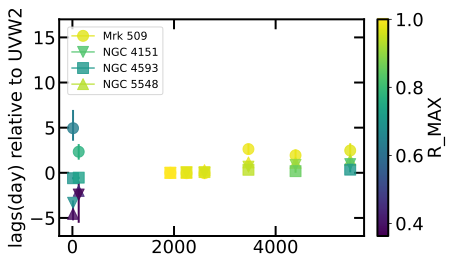

In [40]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

dataplot=swift_lag
ax=plot_errorbar_swift_lagdata_cmap(dataplot,'wavelength','iccf_tau_med',xerr=None,yerr=None,color_n='R_max',marker_n='name',size_n=None,logx=False,logy=False)  

set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
ax.set_ylim(-7,17)
ax.set_ylabel('lags(day) relative to UVW2')


Text(0, 0.5, 'lags(day) relative to UVW2')

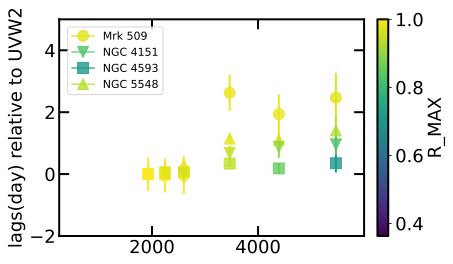

In [43]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

dataplot=swift_lag
ax=plot_errorbar_swift_lagdata_cmap(dataplot,'wavelength','iccf_tau_med',xerr=None,yerr=None,color_n='R_max',marker_n='name',size_n=None,logx=False,logy=False)  

set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
ax.set_ylim(-2,5)
ax.set_xlim(250,6000-1)
ax.set_ylabel('lags(day) relative to UVW2')


In [44]:
swift_lag_namelist=[]
for i in swift_lag['name']:
    if i not in swift_lag_namelist:
        swift_lag_namelist.append(i)

In [45]:
swift_lag_namelist

['Mrk 509', 'NGC 5548', 'NGC 4151', 'NGC 4593']

### plot swift_laguvw2

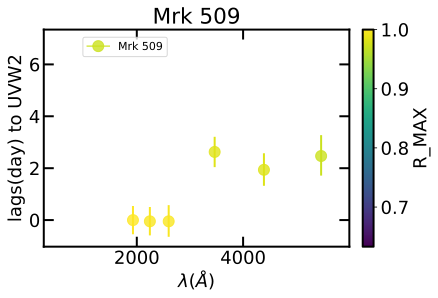

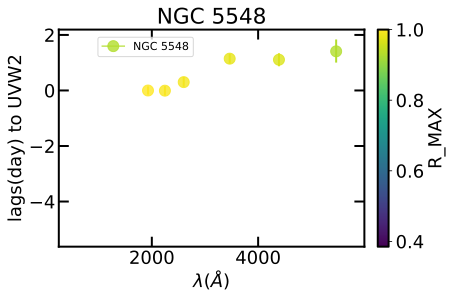

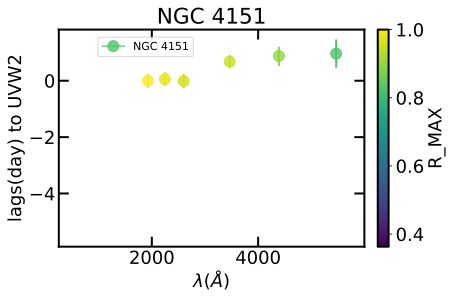

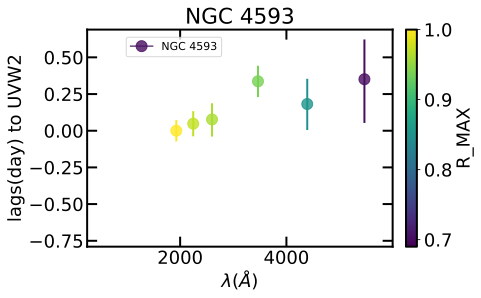

In [46]:
for name in swift_lag_namelist:
    swift_lag_name=swift_lag[swift_lag['name']==name]
    swift_lag_name=drop_index(swift_lag_name)
    
    figure_n= 1
    fig = plt.figure(figsize=(6,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)

    dataplot=swift_lag_name
    ax=plot_errorbar_swift_lagdata_cmap(dataplot,'wavelength','iccf_tau_med',xerr=None,yerr=None,color_n='R_max',marker_n='name',size_n=None,logx=False,logy=False)  

    set_ax_tick(ax) 
    #set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
    set_ax_legend(ax,bbox_to_anchor=(0.11, 0.99))   
    #ax.set_ylim(-7,7)
    ax.set_xlabel('$\lambda (\AA) $')
    ax.set_ylabel('lags(day) to UVW2')
    ax.set_xlim(250,6000-1)
    ax.set_title(name)
    plt.savefig('/Users/lyubing/Downloads/CLAGN_swift/lag_lambda/Swift_intensitylag_%s_lag2UVW2_uvonly.png'%name,dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
swift_lag

In [47]:
CLAGN_swift_lag_result_bin1_uvw2asreference=pd.read_csv('/Users/lyubing/Downloads/CLAGN_swift_lag_result_bin1_uvw2asreference.txt',header=None)
CLAGN_swift_lag_result_bin1_uvw2asreference.columns=['Name','refband','secband','lag','lag_upper','lag_lower','r','tstart','tend','lag_l','lag_r','Num_ref','tmin_ref','tmax_ref','Num_secband','tmin_sec','tmax_sec']

CLAGN_swift_lag_result_bin1_uvw2asreference

In [49]:
CLAGN_swift_lagUVW2_namelists=[]
for i in CLAGN_swift_lag_result_bin1_uvw2asreference["Name"]:
    if i not in CLAGN_swift_lagUVW2_namelists:
        CLAGN_swift_lagUVW2_namelists.append(i)
print(CLAGN_swift_lagUVW2_namelists)

['Mrk590', 'NGC4151', 'NGC5548', 'NGC2617', 'NGC1566']


## CLAGN_swift_lag_result_bin1_uvw2asreference

### def plot_errorbar_UVW2_lagdata_cmap

In [50]:
def plot_errorbar_UVW2_lagdata_cmap(data,x,y,xerr=None,yerr=None,color_n=None,marker_n=None,size_n=None,logx=False,logy=False):    
    if marker_n is not None:
    #Get the scalar map, plot the data using the plot_data function above
        pmarker=data[marker_n].drop_duplicates()
        marker_dict = dict(zip(pmarker, markers_pd[:len(pmarker)]))
        
    sm = cmap_setup(cmap='viridis', min_freq=min(data[color_n]), max_freq=max(data[color_n])) #Greys
    cbar = fig.colorbar(sm,fraction=0.046, pad=0.04)
    cbar.set_label(str.upper(color_n))
    
    for row in range(len(data)):    
        if data.loc[row][x]=='X-ray':
            px=124
            
        else:    
            px=lambda_dict_UVlabel[data.loc[row][x]]
            
        py=data.loc[row][y]
        #x_=data.loc[row][xerr]
        #y_=data.loc[row][yerr]          
        colorval = sm.to_rgba(data.loc[row][color_n] )
        marker=marker_dict[data.loc[row][marker_n]]
              
        #label=data.loc[row]['Name']
        label= '%s:%d-%d'%(data.loc[row]['Name'],data.loc[row]['tstart'],data.loc[row]['tend'])
        
        if size_n ==None :
            size=10
        else:
            minsize=min(data[size_n])
            maxsize=max(data[size_n])
            size=5+(data.loc[row][size_n]-minsize)/(maxsize-minsize)*3   
        
        #print(px,py,py+data.loc[row]['lag_lower'],py+data.loc[row]['lag_upper'])
        
        ax.errorbar(px,py,
                    #xerr=x_,
                    #yerr=y_,
                    #linestyle='--', 
                    marker=marker,
                    markersize=11, color=colorval,
                    label=label,alpha=0.8)
        
        ax.vlines(x=px,ymin=py+data.loc[row]['lag_lower'], ymax=py+data.loc[row]['lag_upper'],
                   linestyle='-',lw=2,color=colorval,
                  )
    return ax

Text(0, 0.5, 'lags(day) relative to UVW2')

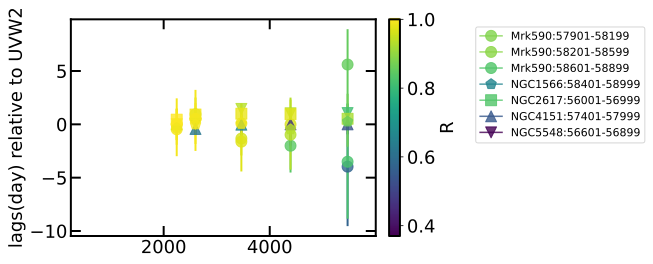

In [55]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

dataplot=CLAGN_swift_lag_result_bin1_uvw2asreference
ax=plot_errorbar_UVW2_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='Name',size_n=None,logx=False,logy=False)  

set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(1.31, 0.99))   
#ax.set_ylim(-5,12)
ax.set_xlim(250,6000-1)
ax.set_ylabel('lags(day) relative to UVW2')


CLAGN_swift_lag_result_bin1_uvw2asreference_Mrk590=CLAGN_swift_lag_result_bin1_uvw2asreference[CLAGN_swift_lag_result_bin1_uvw2asreference['Name']=='Mrk590']
CLAGN_swift_lag_result_bin1_uvw2asreference_Mrk590 =drop_index(CLAGN_swift_lag_result_bin1_uvw2asreference_Mrk590)                                                                                         
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

dataplot=CLAGN_swift_lag_result_bin1_uvw2asreference_Mrk590
ax=plot_errorbar_UVW2_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='tstart',size_n=None,logx=False,logy=False)  

set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
ax.set_ylim(-7,10)
ax.set_ylabel('lags(day) relative to UVW2')
ax.set_title('Mrk590')


### plot lagUVW2

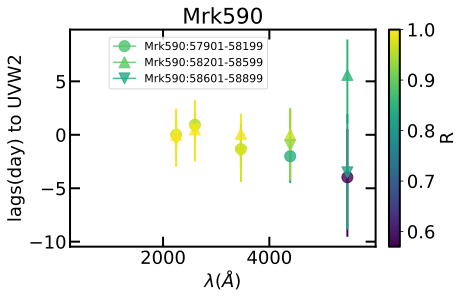

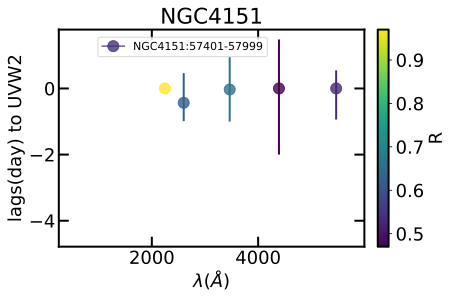

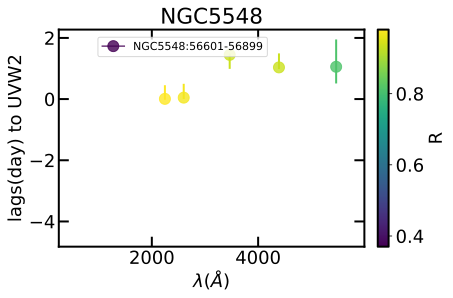

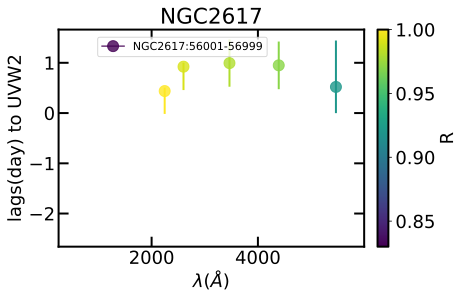

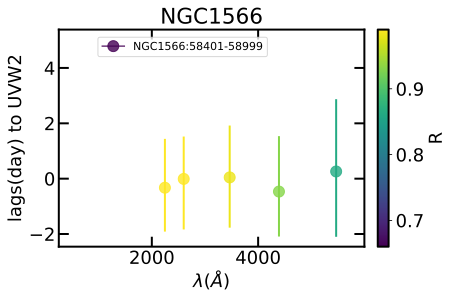

In [56]:
for name in CLAGN_swift_lagUVW2_namelists:
    CLAGN_swift_lag_result_bin1_uvw2asreference_name=CLAGN_swift_lag_result_bin1_uvw2asreference[CLAGN_swift_lag_result_bin1_uvw2asreference['Name']==name]
    CLAGN_swift_lag_result_bin1_uvw2asreference_name=drop_index(CLAGN_swift_lag_result_bin1_uvw2asreference_name)

    
    figure_n= 1
    fig = plt.figure(figsize=(6,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)

    dataplot=CLAGN_swift_lag_result_bin1_uvw2asreference_name
    ax=plot_errorbar_UVW2_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='tstart',size_n=None,logx=False,logy=False)  

    set_ax_tick(ax) 
    #set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
    set_ax_legend(ax,bbox_to_anchor=(0.11, 0.99))   
    #ax.set_ylim(-7,12)
    ax.set_xlabel('$\lambda (\AA) $')
    ax.set_ylabel('lags(day) to UVW2')
    ax.set_xlim(250,6000-1)
    ax.set_title(name)
    plt.savefig('/Users/lyubing/Downloads/CLAGN_swift/lag_lambda/Swift_%s_lag2UVW2_onlyuv.png'%name,dpi=400, transparent=False, bbox_inches='tight')

## CLAGN_swift_lag_result_bin1_Xrayasreference

In [ ]:
CLAGN_swift_lag_result_bin1_Xrayasreference=pd.read_csv('/Users/lyubing/Downloads/CLAGN_swift_lag_result_bin1_Xrayasreference.txt',header=None)
CLAGN_swift_lag_result_bin1_Xrayasreference.columns=['Name','refband','secband','lag','lag_upper','lag_lower','r','tstart','tend','lag_l','lag_r','Num_ref','tmin_ref','tmax_ref','Num_secband','tmin_sec','tmax_sec']

In [ ]:
CLAGN_swift_lag_result_bin1_Xrayasreference

In [ ]:
lambda_dict_uv

In [ ]:
lambda_dict_UVlabel[CLAGN_swift_lag_result_bin1_Xrayasreference['secband'][0]]

### def plot_errorbar_lagdata_cmap Xrayasref

In [ ]:
def plot_errorbar_lagdata_cmap(data,x,y,xerr=None,yerr=None,color_n=None,marker_n=None,size_n=None,logx=False,logy=False):    
    if marker_n is not None:
    #Get the scalar map, plot the data using the plot_data function above
        pmarker=data[marker_n].drop_duplicates()
        marker_dict = dict(zip(pmarker, markers_pd[:len(pmarker)]))
        
    sm = cmap_setup(cmap='viridis', min_freq=min(data[color_n]), max_freq=max(data[color_n])) #Greys
    cbar = fig.colorbar(sm,fraction=0.046, pad=0.04)
    cbar.set_label(str.upper(color_n))
    
    for row in range(len(data)):        
        px=lambda_dict_UVlabel[data.loc[row][x]]
        py=data.loc[row][y]
        #x_=data.loc[row][xerr]
        #y_=data.loc[row][yerr]          
        colorval = sm.to_rgba(data.loc[row][color_n] )
        marker=marker_dict[data.loc[row][marker_n]]
              
        #label=data.loc[row]['Name']
        label= '%s:%d-%d'%(data.loc[row]['Name'],data.loc[row]['tstart'],data.loc[row]['tend'])
        
        if size_n ==None :
            size=10
        else:
            minsize=min(data[size_n])
            maxsize=max(data[size_n])
            size=5+(data.loc[row][size_n]-minsize)/(maxsize-minsize)*3   
        
        #print(px,py,py+data.loc[row]['lag_lower'],py+data.loc[row]['lag_upper'])
        
        ax.errorbar(px,py,
                    #xerr=x_,
                    #yerr=y_,
                    #linestyle='--', 
                    marker=marker,
                    markersize=11, color=colorval,
                    label=label,alpha=0.8)
        
        ax.vlines(x=px,ymin=py+data.loc[row]['lag_lower'], ymax=py+data.loc[row]['lag_upper'],
                   linestyle='-',lw=2,color=colorval
                  )

    return ax

In [ ]:
CLAGN_swift_lag_result_bin1_Xrayasreference.columns

In [ ]:
CLAGN_swift_lag_namelists=[]
for i in CLAGN_swift_lag_result_bin1_Xrayasreference["Name"]:
    if i not in CLAGN_swift_lag_namelists:
        CLAGN_swift_lag_namelists.append(i)

In [ ]:
CLAGN_swift_lag_namelists

In [ ]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

dataplot=CLAGN_swift_lag_result_bin1_Xrayasreference
ax=plot_errorbar_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='Name',size_n=None,logx=False,logy=False)  

set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
ax.set_ylim(-5,25)
ax.set_ylabel('lags(day) relative to X-ray')


In [ ]:
CLAGN_swift_lag_result_bin1_Xrayasreference_Mrk590=CLAGN_swift_lag_result_bin1_Xrayasreference[CLAGN_swift_lag_result_bin1_Xrayasreference['Name']=='Mrk590']
CLAGN_swift_lag_result_bin1_Xrayasreference_Mrk590=drop_index(CLAGN_swift_lag_result_bin1_Xrayasreference_Mrk590)

In [ ]:
CLAGN_swift_lag_result_bin1_Xrayasreference_Mrk590.columns

In [ ]:
figure_n= 1
fig = plt.figure(figsize=(6,figure_n*4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

dataplot=CLAGN_swift_lag_result_bin1_Xrayasreference_Mrk590
ax=plot_errorbar_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='tstart',size_n=None,logx=False,logy=False)  

set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
ax.set_ylim(-5,12)
ax.set_ylabel('lags(day) relative to X-ray')
ax.set_title('Mrk590')


### plot CLAGN_swift_lag_Xrayasreference

In [ ]:
for name in CLAGN_swift_lag_namelists:
    CLAGN_swift_lag_result_bin1_Xrayasreference_name=CLAGN_swift_lag_result_bin1_Xrayasreference[CLAGN_swift_lag_result_bin1_Xrayasreference['Name']==name]
    CLAGN_swift_lag_result_bin1_Xrayasreference_name=drop_index(CLAGN_swift_lag_result_bin1_Xrayasreference_name)

    
    figure_n= 1
    fig = plt.figure(figsize=(6,figure_n*4))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(figure_n,1,1)

    dataplot=CLAGN_swift_lag_result_bin1_Xrayasreference_name
    ax=plot_errorbar_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='tstart',size_n=None,logx=False,logy=False)  

    set_ax_tick(ax) 
    #set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
    set_ax_legend(ax,bbox_to_anchor=(0.11, 0.99))   
    #ax.set_ylim(-5,12)
    ax.set_xlabel('$\lambda (\AA) $')
    ax.set_ylabel('lags(day) behind X-ray')
    ax.set_title(name)
    plt.savefig('/Users/lyubing/Downloads/Swift_%s_lag2Xray.png'%name,dpi=400, transparent=False, bbox_inches='tight')

for i in range(len(dataplot)):
    x= lambda_dict_UVlabel[dataplot.iloc[i]['secband']]
    
    y=dataplot.iloc[i]['lag']
    yerr= [dataplot.iloc[i]['lag_upper'],-1*dataplot.iloc[i]['lag_lower']]
    #xerr=dataplot.iloc[i]['mjderr']
    #yerr=dataplot.iloc[i]['scaled_rms']
    color=    dataplot.iloc[i]['r']
    label=dataplot.iloc[i]['Name']  
    
    ax.scatter(x,y,
               color=color,label=label,
               cmap=cm.coolwarm,
              )    


In [ ]:
    
''' ax.errorbar(x=x,y=y,
           #xerr=xerr,
           #yerr=yerr,
           marker='o',ms=11., mew=1, capsize=0,
           mec=color,ecolor=color,
           elinewidth=2,fmt='o',ls='',fillstyle='none',label=label)
'''

## CLAGN_BXA_lag_bin_dot5_uvw2asreference

In [74]:
CLAGN_BXA_lag_bin_dot5_uvw2asreference=pd.read_csv('/Users/lyubing/Downloads/CLAGN_swift_BXA_lag_result_bin0.5_uvw2asreference.txt',header=None)
CLAGN_BXA_lag_bin_dot5_uvw2asreference.columns=['Name','refband','secband','lag','lag_upper','lag_lower','r','tstart','tend','lag_l','lag_r','Num_ref','tmin_ref','tmax_ref','Num_secband','tmin_sec','tmax_sec']

In [75]:
CLAGN_BXA_lag_bin_dot5_uvw2asreference

Name refband secband    lag  lag_upper  lag_lower     r  tstart   tend  \
0   NGC1566    UVW2       V -0.984      2.705     -2.430  0.84   58401  59899   
1   NGC1566    UVW2       B -0.298      1.911     -1.840  0.91   58401  59899   
2   NGC1566    UVW2       U  0.046      1.786     -1.761  0.98   58401  59899   
3   NGC1566    UVW2    UVW1 -0.445      1.690     -1.639  0.98   58401  59899   
4   NGC1566    UVW2    UVM2 -0.378      1.875     -1.803  0.99   58401  59899   
5   NGC1566    UVW2   X-ray  1.660      1.809     -1.455  0.59   58401  59899   
6   NGC1566    UVW2       V -0.887      3.126     -2.705  0.85   58401  58699   
7   NGC1566    UVW2       B -0.170      2.166     -1.957  0.93   58401  58699   
8   NGC1566    UVW2       U -0.099      1.844     -1.837  0.98   58401  58699   
9   NGC1566    UVW2    UVW1 -0.568      1.753     -1.813  0.99   58401  58699   
10  NGC1566    UVW2    UVM2 -0.519      1.760     -1.940  0.99   58401  58699   
11  NGC1566    UVW2   X-ray  2.423      2.234     -1.676  0.65   58401  58699   

    lag_l  lag_r  Num_ref  tmin_ref  tmax_ref  Num_secband  tmin_sec  tmax_sec  
0     -20     20      126     58402     59124          123     58402     59124  
1     -20     20      126     58402     59124          127     58402     59143  
2     -20     20      126     58402     59124          129     58402     59143  
3     -20     20      126     58402     59124          130     58402     59143  
4     -20     20      126     58402     59124          122     58402     59124  
5     -20     20      126     58402     59124          132     58402     59143  
6     -20     20       81     58402     58695           79     58402     58695  
7     -20     20       81     58402     58695           82     58402     58695  
8     -20     20       81     58402     58695           83     58402     58695  
9     -20     20       81     58402     58695           83     58402     58695  
10    -20     20       81     58402     58695           78     58402     58695  
11    -20     20       81     58402     58695           84     58402     58695

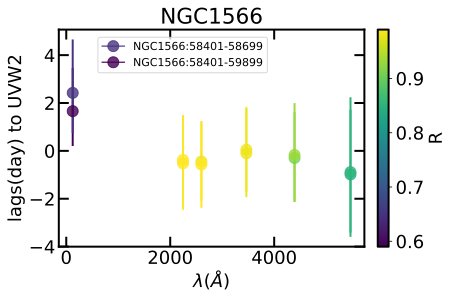

In [80]:
for name in CLAGN_swift_lagUVW2_namelists:
    CLAGN_BXA_lag_bin_dot5_uvw2asreference_name=CLAGN_BXA_lag_bin_dot5_uvw2asreference[CLAGN_BXA_lag_bin_dot5_uvw2asreference['Name']==name]
    CLAGN_BXA_lag_bin_dot5_uvw2asreference_name=drop_index(CLAGN_BXA_lag_bin_dot5_uvw2asreference_name)
    dataplot=CLAGN_BXA_lag_bin_dot5_uvw2asreference_name
    if len(dataplot)>0:    
        figure_n= 1
        fig = plt.figure(figsize=(6,figure_n*4))
        fig.subplots_adjust(hspace=0.0, wspace = 0.0)
        ax = fig.add_subplot(figure_n,1,1)

        

        ax=plot_errorbar_UVW2_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='tstart',size_n=None,logx=False,logy=False)  

        set_ax_tick(ax) 
        #set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
        set_ax_legend(ax,bbox_to_anchor=(0.11, 0.99))   
        #ax.set_ylim(-7,12)
        ax.set_xlabel('$\lambda (\AA) $')
        ax.set_ylabel('lags(day) to UVW2')
        #ax.set_xlim(250,6000-1)
        ax.set_title(name)
        plt.savefig('/Users/lyubing/Downloads/CLAGN_swift/lag_lambda/Swift_%s_BXA_lag2UVW2.png'%name,dpi=400, transparent=False, bbox_inches='tight')

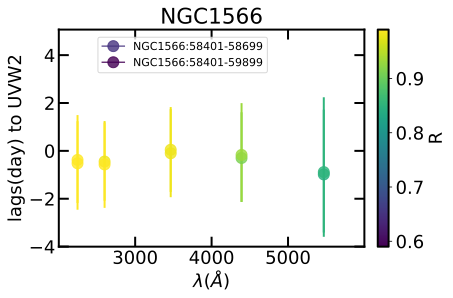

In [83]:
for name in CLAGN_swift_lagUVW2_namelists:
    CLAGN_BXA_lag_bin_dot5_uvw2asreference_name=CLAGN_BXA_lag_bin_dot5_uvw2asreference[CLAGN_BXA_lag_bin_dot5_uvw2asreference['Name']==name]
    CLAGN_BXA_lag_bin_dot5_uvw2asreference_name=drop_index(CLAGN_BXA_lag_bin_dot5_uvw2asreference_name)
    dataplot=CLAGN_BXA_lag_bin_dot5_uvw2asreference_name
    if len(dataplot)>0:    
        figure_n= 1
        fig = plt.figure(figsize=(6,figure_n*4))
        fig.subplots_adjust(hspace=0.0, wspace = 0.0)
        ax = fig.add_subplot(figure_n,1,1)        

        ax=plot_errorbar_UVW2_lagdata_cmap(dataplot,'secband','lag',xerr=None,yerr=None,color_n='r',marker_n='tstart',size_n=None,logx=False,logy=False)  

        set_ax_tick(ax) 
        #set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
        set_ax_legend(ax,bbox_to_anchor=(0.11, 0.99))   
        #ax.set_ylim(-7,12)
        ax.set_xlabel('$\lambda (\AA) $')
        ax.set_ylabel('lags(day) to UVW2')
        ax.set_xlim(2000+1,6000-1)
        ax.set_title(name)
        plt.savefig('/Users/lyubing/Downloads/CLAGN_swift/lag_lambda/Swift_%s_BXA_lag2UVW2_onlyUV.png'%name,dpi=400, transparent=False, bbox_inches='tight')

# def plot_errorbar_cmap_onesource

In [86]:
def plot_errorbar_cmap(ax,data,x,y,xerr=None,yerr=None,color_n=None,marker_n=None,size_n=None,logx=False,logy=False):    
    if marker_n is not None:
    #Get the scalar map, plot the data using the plot_data function above
        pmarker=data[marker_n].drop_duplicates()
        marker_dict = dict(zip(pmarker, markers_pd[:len(pmarker)]))
        
    sm = cmap_setup(cmap='viridis', min_freq=min(data[color_n]), max_freq=max(data[color_n])) #Greys
    cbar = fig.colorbar(sm,fraction=0.046, pad=0.04)
    cbar.set_label(str.upper(color_n))
    
    for row in range(len(data)):    
        if xerr==None:
            x_=0
        else:
            x_=data.loc[row][xerr]
            
        if yerr==None:
            y_=0
        else:
            y_=data.loc[row][yerr]    
         
        if y_<0:
            y_=0
            
        px=data.loc[row][x]        
        py=data.loc[row][y]
                 
        colorval = sm.to_rgba(data.loc[row][color_n] )
        marker=marker_dict[data.loc[row][marker_n]]             
        label=data.loc[row]['name']
        
        
        if size_n ==None :
            size=10
        else:
            minsize=min(data[size_n])
            maxsize=max(data[size_n])
            size=5+(data.loc[row][size_n]-minsize)/(maxsize-minsize)*3   
        
        #print(px,py,py+data.loc[row]['lag_lower'],py+data.loc[row]['lag_upper'])
        #pyerr= data.loc[row]['iccf_tau_error']
        #pyerr_upper= float(pyerr.split('/')[0])
        #pyerr_lower= float(pyerr.split('/')[1])

        
        ax.errorbar(px,
                    py,
                    xerr=x_,
                    yerr=y_,
                    #linestyle='--', 
                    marker=marker,
                    markersize=11, color=colorval,
                    label=label,alpha=0.8)      
        #ax.vlines(x=px,ymin=py+pyerr_lower, ymax=py+pyerr_upper,linestyle='-',lw=2,color=colorval,)                
    return ax


Text(0, 0.5, 'gamma')

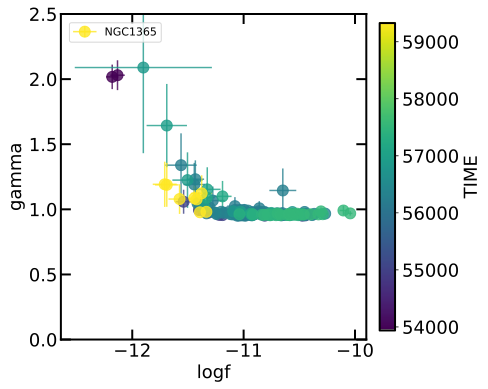

In [89]:
sourcename='NGC1365'
XRT_BXA=pd.read_csv('%s/%s_BXA_results.csv'%('/Users/lyubing/Downloads',sourcename))#,sep='\s+',header=0)
XRT_BXA['name']=sourcename

figure_n= 1
fig = plt.figure(figsize=(6,figure_n*6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)

xlabel='logf'
ylabel='gamma'
xerr_label='logf_err'
yerr_label='gamma_err'
color_label='time'

#dataplot=slab_zgauss_result[:3]
#ax=plot_errorbar_cmap(ax,dataplot,xlabel,ylabel,xerr=xerr_label,yerr=yerr_label,color_n=color_label,marker_n='name',size_n=None,logx=False,logy=False)

dataplot=XRT_BXA
ax=plot_errorbar_cmap(ax,dataplot,xlabel,ylabel,xerr=xerr_label,yerr=yerr_label,color_n='time',marker_n='name',size_n=None,logx=False,logy=False)
set_ax_tick(ax) 
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
ax.set_ylim(0,2.5)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# CCF_result

## Mrk590

## X-rayasreference

In [ ]:
sourcename='Mrk590'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57900+1,58200-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
sourcename='Mrk590'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58200+1,58600-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
sourcename='Mrk590'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58600+1,58900-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## UW2asreference 

In [ ]:
sourcename='Mrk590'
uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57900+1,58200-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    
    


In [ ]:
sourcename='Mrk590'
uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58200+1,58600-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    
    


In [ ]:
sourcename='Mrk590'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58600+1,58900-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    
    


## ztf-asassn

In [ ]:
labelname1="ZTF-r"
labelname2="ASASSN-V"

dataname1=lag_zrf_r_Mrk590
dataname2=lag_asassn_v_Mrk590

sourcename_label='Mrk590'
rangemin,rangemax=58200+1,58600-1
lagrangel=-30
lagrangeh=30

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
labelname1="ZTF-r"
labelname2="ASASSN-g"

dataname1=lag_zrf_r_Mrk590
dataname2=lag_asassn_g_Mrk590

sourcename_label='Mrk590'
rangemin,rangemax=58200+1,58600-1
lagrangel=-30
lagrangeh=30

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
labelname1="ZTF-r"
labelname2="ASASSN-g"

dataname1=lag_zrf_r_Mrk590
dataname2=lag_asassn_g_Mrk590

sourcename_label='Mrk590'
rangemin,rangemax=58600+1,58900-1
lagrangel=-30
lagrangeh=30

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


# Other Sources

In [ ]:
sources_names=[]
for i in os.listdir(dataroot_dir):
    if i.endswith('_xrt_rate.txt'):
        name=i.split('_xrt_rate.txt')[0]
        if name not in sources_names:
            sources_names.append(name)
            

In [ ]:
sources_names

sourcename='Mrk1018'
uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uvv.columns

In [ ]:
for sourcename in sources_names:

    uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
    uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
    uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
    uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
    uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
    uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

    uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
    uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

    XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
    XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
    XRT_rate_=drop_index(XRT_rate_)
    
    fig = plt.figure(figsize=(12, 8))
    #fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
    # Add axes object to our figure that takes up entire figure
    #ax = fig.add_axes([0, 0, 1, 1])
    ax=fig.add_subplot(1,1,1)

    for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
        if sourcename=='Mrk1018':
            ax.errorbar(uf_[uf_.columns[2]],uf_[uf_.columns[5]],uf_[uf_.columns[6]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    
            
        else:
            ax.errorbar(uf_[uf_.columns[3]],uf_[uf_.columns[6]],uf_[uf_.columns[7]],color=c_,marker=m_,alpha=0.8,ls=':',label=label_dict_uv[band])    



    ax_x=ax.twinx()
    ax_x.errorbar(XRT_rate_['time'],XRT_rate_['rate'],XRT_rate_['error'],
                 marker='o',
                 color='grey',
                 label='XRT',ls='',) 
    ax_x.set_ylabel('count/s')

    ax.set_xlabel('MJD')
    ax.set_ylabel('F(mJy)')
    #set_ax_legend(ax)
    set_ax_legend_sequence(ax)
    set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

    set_ax_tick(ax)
    set_ax_locator(ax,xma=1000,xmi=250,yma=2,ymi=0.5)

    plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30)

    ax.set_title(sourcename)
    
    range_l,range_r = ax.set_xlim()    
    #range_l,range_r=(57900+1,59200-1)
    
    #ax.set_xlim(57900+1,59000-1)
    ax.set_xlim(range_l,range_r)
    #ax.set_ylim(0.1,9.9)
    save_lc_img_path='/Users/lyubing/Downloads/CLAGN_swift/%s_UV_XRT_%d_%d.png'%(sourcename,range_l,range_r)
    #save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
    plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')


In [ ]:
dataroot_dir

In [ ]:
!open /Users/lyubing/IHEPBox/data/data_clagn/CLAGN_uvot_XRT_fig

In [ ]:
 29.5 ±1.3ks

In [ ]:
29.5*1000/3600

## sourcename='NGC4151'

In [ ]:
uvot_6bands

### xray

In [ ]:
sourcename='NGC4151'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57400+1,58000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


### UVW2as reference

In [ ]:
sourcename='NGC4151'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57400+1,58000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    
    


## sourcename='NGC5548'

### xray

In [ ]:
sourcename='NGC5548'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56600+1,56900-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


### uvw2

In [ ]:
sourcename='NGC5548'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56600+1,56900-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    
 

## NGC1097

In [ ]:
sourcename='NGC1097'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56100+1,56500-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## sourcename='Fairall9'

In [ ]:
sourcename='Fairall9'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56000+1,57200-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
sourcename='Fairall9'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58000+1,59000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## sourcename='3C390.3'

In [ ]:
sourcename='3C390.3'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57400+1,58000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## NGC2617

### Xray

In [ ]:
sourcename='NGC2617'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56000+1,57000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
sourcename='NGC2617'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57000+1,59000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


### uvw2

In [ ]:
sourcename='NGC2617'
uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56000+1,57000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## NGC3516

In [ ]:
sourcename='NGC3516'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56000+1,56500-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


### uvw2

In [ ]:
sourcename='NGC3516'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=56000+1,56500-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## NGC1566

### Xray

In [ ]:
sourcename='NGC1566'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58000+1,59000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf_xray,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


### uvw2

In [ ]:
sourcename='NGC1566'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

lag_uvw2=uvot_uw2[[uvot_uw2.columns[3],uvot_uw2.columns[6],uvot_uw2.columns[7]]]
lag_uvw2.columns=['t','flux','flux_err']
lag_uvw2=lag_uvw2.sort_values('t')
lag_uvw2=drop_index(lag_uvw2)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    
    if band =='uw2':   
        labelname1='UVW2'
        labelname2="X-ray"#label_dict_uv[band]    
        dataname1=lag_uvw2
        dataname2=lag_Xray_
                   
    else:
        print(band)
        lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
        lag_i.columns=['t','flux','flux_err']
        lag_i=lag_i.sort_values('t')
        lag_i=drop_index(lag_i)
        
        labelname1='UVW2'
        labelname2=label_dict_uv[band]
        dataname1=lag_uvw2
        dataname2=lag_i
        
    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58400+1,59000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## NGC3227

In [ ]:
sourcename='NGC3227'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57100+1,57500-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## NGC7603

In [ ]:
sourcename='NGC7603'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=58200+1,58400-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## ESO362-G18

In [ ]:
sourcename='ESO362-G18'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=55200+1,56000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## ZTF18aajupnt

In [ ]:
sourcename='ZTF18aajupnt'

uvot_uvv=pd.read_csv('%s/%s_uvv_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_ubb=pd.read_csv('%s/%s_ubb_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uuu=pd.read_csv('%s/%s_uuu_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw1=pd.read_csv('%s/%s_uw1_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_um2=pd.read_csv('%s/%s_um2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)
uvot_uw2=pd.read_csv('%s/%s_uw2_sum.csv'%(dataroot_dir,sourcename),sep='|',header=0)

uvot_6band_data=[uvot_uvv,uvot_ubb,uvot_uuu,uvot_uw1,uvot_um2,uvot_uw2]
uvdata_dict=dict(zip(uvot_6bands, uvot_6band_data))

XRT_rate_=pd.read_csv('%s/%s_xrt_rate.txt'%(dataroot_dir,sourcename),sep='\s+',header=0)
XRT_rate_=XRT_rate_[XRT_rate_['rate']>0]
XRT_rate_=drop_index(XRT_rate_)

lag_Xray_=XRT_rate_[['time','rate','error']]
lag_Xray_.columns=['t','flux','flux_err']
lag_Xray_=lag_Xray_.sort_values('t')
lag_Xray_=drop_index(lag_Xray_)

for index,(band,uf_,c_,m_) in enumerate(zip(uvot_6bands,uvot_6band_data,colors_6band,markers_6bands)):
    print(band)
    lag_i=uf_[[uf_.columns[3],uf_.columns[6],uf_.columns[7]]]
    lag_i.columns=['t','flux','flux_err']
    lag_i=lag_i.sort_values('t')
    lag_i=drop_index(lag_i)
    
    
    labelname1="X-ray"
    labelname2=label_dict_uv[band]
    
    dataname1=lag_Xray_
    dataname2=lag_i

    sourcename_label=sourcename
    #rangemin,rangemax=54790,58200
    rangemin,rangemax=57000+1,59000-1
    lagrangel=-20
    lagrangeh=20

    run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
    plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


# OQ 334

## Fermi_OQ334

In [ ]:
Fermi_OQ334=pd.read_csv('/Users/lyubing/Downloads/Changing-look Blazar B2 1420+32/4FGL_J1422.3+3223_daily_12_8_2022.csv')
Fermi_OQ334=Fermi_OQ334[Fermi_OQ334['TS']>4]
Fermi_OQ334=drop_index(Fermi_OQ334)
Fermi_OQ334['mjd']=Fermi_OQ334['Julian Date']-2400000.5

In [ ]:
Fermi_OQ334.columns

In [ ]:
lag_Fermi_OQ334=Fermi_OQ334[['mjd','Photon Flux [0.1-100 GeV](photons cm-2 s-1)','Photon Flux Error(photons cm-2 s-1)']]
lag_Fermi_OQ334.columns=['t','flux','flux_err']
lag_Fermi_OQ334=lag_Fermi_OQ334.sort_values('t')
lag_Fermi_OQ334=drop_index(lag_Fermi_OQ334)
                           

In [ ]:
labelname1="fermi"
labelname2="ZTF-g"

dataname1=lag_Fermi_OQ334
dataname2=lagdata_OQ_334_g

sourcename_label='OQ_334'
rangemin,rangemax=58800+1,58900-1
lagrangel=-20
lagrangeh=20

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## swift_RM

In [ ]:
swift_RMlagdata=pd.read_csv('/Users/lyubing/IHEPBox/data/data_lag/Table 3 Variability Amplitude and Interband Correlation Results_apjaaf3b4t3_ascii copy.txt',
                            delimiter='\s+')




## ztf_OQ_334

In [ ]:
data_OQ_334=pd.read_csv('/Users/lyubing/Downloads/Changing-look Blazar B2 1420+32/OQ334_ztfdata.csv')

In [ ]:
data_OQ_334_g=data_OQ_334[data_OQ_334['filtercode']=='zg']
data_OQ_334_r=data_OQ_334[data_OQ_334['filtercode']=='zr']
data_OQ_334_i=data_OQ_334[data_OQ_334['filtercode']=='zi']

In [ ]:
mag_label_,magerr_label=('mag','magerr')
data_OQ_334_g=ztf_mag2flux(data_OQ_334_g,mag_label_,magerr_label)
data_OQ_334_r=ztf_mag2flux(data_OQ_334_r,mag_label_,magerr_label)
data_OQ_334_i=ztf_mag2flux(data_OQ_334_i,mag_label_,magerr_label)

In [ ]:
data_OQ_334_g.columns

In [ ]:
lagdata_OQ_334_g=get_lagdata_ztf(data_OQ_334_g)
lagdata_OQ_334_r=get_lagdata_ztf(data_OQ_334_r)
lagdata_OQ_334_i=get_lagdata_ztf(data_OQ_334_i)

In [ ]:
labelname1="ZTF-g"
labelname2="ZTF-r"

dataname1=lagdata_OQ_334_g
dataname2=lagdata_OQ_334_r

sourcename_label='OQ_334'
rangemin,rangemax=58400+1,58900-1
lagrangel=-30
lagrangeh=30

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


In [ ]:
labelname1="ZTF-g"
labelname2="ZTF-i"

dataname1=lagdata_OQ_334_g
dataname2=lagdata_OQ_334_i

sourcename_label='OQ_334'
rangemin,rangemax=58600+1,58900-1
lagrangel=-30
lagrangeh=30

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)    


## plot

In [ ]:
fig = plt.figure(figsize=(12, 8))
#fig.subplots_adjust(left=0.1, right=0.75, bottom=0.12, top=0.95)
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(2,1,1)


ax.errorbar(lag_Fermi_OQ334['t'],
            lag_Fermi_OQ334['flux'],
            #lag_Fermi_OQ334['flux_err'],    
            color='b',marker='.',alpha=0.8,ls=':',label='Fermi')    
    



ax_x=fig.add_subplot(2,1,2)

ax_x.errorbar(data_OQ_334_g['mjd'],
            data_OQ_334_g['flux']*1000,
            yerr=data_OQ_334_g['flux_err']*1000,            
            marker='*',
            color='green',
            label='ztf-g',ls='',) 
ax_x.errorbar(data_OQ_334_r['mjd'],
            data_OQ_334_r['flux']*1000,
            yerr=data_OQ_334_r['flux_err']*1000,  
            color='red',
            marker='*',
            label='ztf-r',ls='',) 
ax_x.errorbar(data_OQ_334_i['mjd'],
            data_OQ_334_i['flux']*1000,
            yerr=data_OQ_334_i['flux_err']*1000 ,           
            marker='*',
            color='cyan',
            label='ztf-i',ls='',) #ax_x.set_ylabel('')

ax_x.set_xlabel('MJD')
ax_x.set_ylabel('F(Jy)')
#set_ax_legend(ax)
set_ax_legend_sequence(ax)
set_ax_legend(ax_x,bbox_to_anchor=(0.8,0.99))

set_ax_tick(ax)
set_ax_locator(ax,xma=200,xmi=100,yma=2e-8,ymi=1e-8)

plot_secax(ax,mi_interval=60,ma_interval=180,rotation=30)

ax.set_title('OQ334')
range_l,range_r=(59600+1,59930-1)
#ax.set_xlim(57900+1,59000-1)
ax.set_xlim(range_l,range_r)
#ax.set_ylim(0.1,9.9)
save_lc_img_path='/Users/lyubing/Downloads/OQ334_Fermi_ztf_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
